In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from nbodykit.lab import *
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

plt.style.use('dark_background')
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 22

print("We import all necessary libraries")

We import all necessary libraries


We need to create a density field with a bias of 2.2 and then a second density field with a bias of 6.6. Since the bias is scaled by a factor of 3, we expect that $\zeta \propto P(k)^2 \propto b^4$. So a nice test for my 4PCF code is to do this shift with the same random number seed to avoid random fluctuations

## Generate Gaussian Random Fields, both Unscaled and Scaled

In [2]:
from mk_Gaussian_Catalog import GenerateGRF

###############################################
#             Set GRF Parameters
###############################################
Nmesh = 64
cname =  '/Users/jamessunseri/desktop/uf_reu/4pcf_ISM/Testing/4pcf_scaling_test/'
Pk_in = None


cname_unscaled = 'deltar_unscaled'

grf_unscaled = GenerateGRF(Nmesh, Pk_in=Pk_in, do_inv_phase=True, bias=2.2,
                   cname=cname, cname_dfield=cname_unscaled)
grf_unscaled.run_mk_catalog_grf_weighted(do_save_catalog=True)

cname_scaled = 'deltar_scaled'

grf_scaled = GenerateGRF(Nmesh, Pk_in=Pk_in, do_inv_phase=True, bias=6.6, 
                 cname=cname, cname_dfield=cname_scaled)
grf_scaled.run_mk_catalog_grf_weighted(do_save_catalog=True)

#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565


/Users/jamessunseri/anaconda3/lib/python3.7/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/Users/jamessunseri/anaconda3/lib/python3.7/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565


## Load in GRF Density Fields 

In [3]:
data_unscaled = np.load(cname + 'deltar_unscaled.npy')
print("Loading in our unscaled GRF, it has dimensions of " + str(np.shape(data_unscaled)))

data_scaled = np.load(cname + 'deltar_scaled.npy')
print("Loading in our scaled GRF, it has dimensions of " + str(np.shape(data_scaled)))

Loading in our unscaled GRF, it has dimensions of (64, 64, 64)
Loading in our scaled GRF, it has dimensions of (64, 64, 64)


## Lets view the GRF $\delta$ Fields

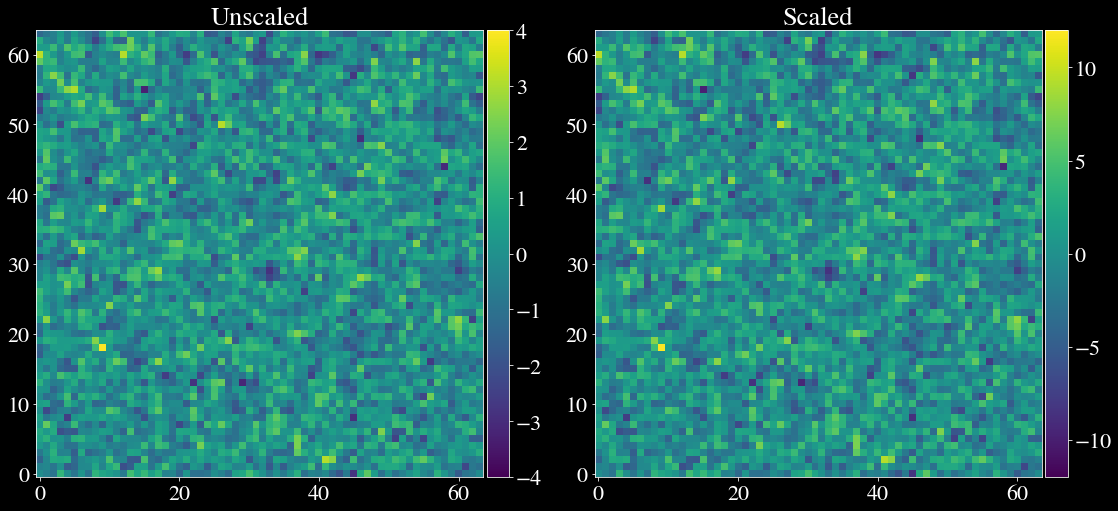

In [4]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

ax1.set_title('Unscaled')
im1 = ax1.imshow(data_unscaled[:,:,32], origin='lower')
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
im1.set_clim(-4, 4)

ax2.set_title('Scaled')
im2 = ax2.imshow(data_scaled[:,:,32], origin='lower')
divider2 = axgrid.make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)
im2.set_clim(-4*3,4*3)
f.tight_layout()
plt.show()   

Yay! we changed the bias by a factor of 3 and we actually see that reflected in the plots. The maxima from the scaled plot are different by exactly a factor of 3!

## Measure the 4PCF of the two fields with my code

In [6]:
#Load in data from 4pcf calculation
zeta_1 = np.load('../Workspace/4pcf_coefficients_normed_GRF_unscaled.npy')

print(np.shape(zeta_1))

#Load in data from 4pcf calculation
zeta_2 = np.load('../Workspace/4pcf_coefficients_normed_GRF_scaled.npy')

print(np.shape(zeta_2))

boundsandnumber = np.load("../Workspace/bin_bounds_and_pixel_number_demo.npy")
nbins = len(boundsandnumber[0,:]) - 1

b0_ave = (boundsandnumber[0,0] + boundsandnumber[0,1])/2
b1_ave = (boundsandnumber[0,1] + boundsandnumber[0,2])/2
b2_ave = (boundsandnumber[0,2] + boundsandnumber[0,3])/2
b3_ave = (boundsandnumber[0,3] + boundsandnumber[0,4])/2
average_bins = [b0_ave, b1_ave, b2_ave, b3_ave]
# ratio = (zeta_2)/(zeta + 1e-10)

(6, 6, 6, 4, 4, 4)
(6, 6, 6, 4, 4, 4)


## Determine if the scaling works as expected by viewing the 4PCF

In [7]:
zeta_000_unscaled = []
zeta_000_scaled = []

zeta_220_unscaled = []
zeta_220_scaled = []

bin_indexes = []
b_i = 1
for b1 in range(nbins):
    for b2 in range(nbins):
        for b3 in range(nbins):
            value_unscaled = (zeta_1[0,0,0,b1,b2,b3].real * average_bins[b1] * 
            average_bins[b2] * average_bins[b3])
            
            value_scaled = (zeta_2[0,0,0,b1,b2,b3].real * average_bins[b1] * 
            average_bins[b2] * average_bins[b3])
            zeta_000_unscaled.append(value_unscaled)
            zeta_000_scaled.append(value_scaled)
            bin_indexes.append(b_i)
            b_i += 1
            
            
bin_indexes = []
b_i = 1
for b1 in range(nbins):
    for b2 in range(nbins):
        for b3 in range(nbins):
            value_unscaled = (zeta_1[2,2,0,b1,b2,b3].real * average_bins[b1] * 
            average_bins[b2] * average_bins[b3])
            
            value_scaled = (zeta_2[2,2,0,b1,b2,b3].real * average_bins[b1] * 
            average_bins[b2] * average_bins[b3])
            zeta_220_unscaled.append(value_unscaled)
            zeta_220_scaled.append(value_scaled)
            bin_indexes.append(b_i)
            b_i += 1
            
zeta_000_unscaled = np.array(zeta_000_unscaled)
zeta_000_scaled = np.array(zeta_000_scaled)

zeta_220_unscaled = np.array(zeta_220_unscaled)
zeta_220_scaled = np.array(zeta_220_scaled)

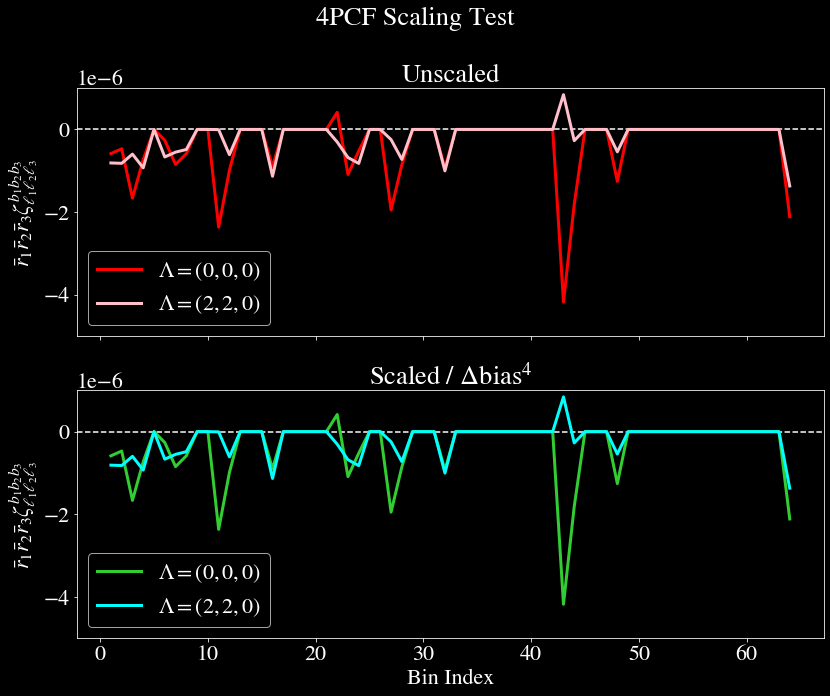

In [8]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10), sharex=True)
f.suptitle("4PCF Scaling Test")


ax1.set_title('Unscaled')
ax1.axhline(y=0, xmin=0, xmax=64, color='white', linestyle='--')
ax1.plot(bin_indexes, zeta_000_unscaled, 'r-', linewidth=3, label="$\\Lambda = (0,0,0)$")
ax1.plot(bin_indexes, zeta_220_unscaled, color='pink', linestyle='-',
         linewidth=3, label="$\\Lambda = (2,2,0)$")
ax1.set_ylabel("$\\bar{r}_1 \\bar{r}_2 \\bar{r}_3 \\zeta^{b_1 b_2 b_3}_{\ell_1 \ell_2 \ell_3}$")
ax1.legend()
ax1.set_ylim(-5e-6,1e-6)

ax2.set_title('Scaled / $\\Delta$bias$^4$')
ax2.axhline(y=0, xmin=0, xmax=64, color='white', linestyle='--')
ax2.plot(bin_indexes, zeta_000_scaled/81, color='limegreen', linestyle='-',
         linewidth=3, label="$\\Lambda = (0,0,0)$")
ax2.plot(bin_indexes, zeta_220_scaled/81, color='cyan', linestyle='-',
         linewidth=3, label="$\\Lambda = (2,2,0)$")
ax2.set_xlabel("Bin Index")
ax2.set_ylabel("$\\bar{r}_1 \\bar{r}_2 \\bar{r}_3 \\zeta^{b_1 b_2 b_3}_{\ell_1 \ell_2 \ell_3}$")
ax2.legend()
ax2.set_ylim(-5e-6,1e-6)
plt.tight_layout()
plt.show()


There we have it! A succesful test showing that the $\zeta^B_\Lambda$ does in fact get scaled by the bias$^4$